# Example 2D Truss Structure Analysis using Julia
A simple application of Julia Basic commands to simple truss structures analysis (based on https://github.com/jorgepz/trussStrEAM/blob/master/FEMTrusS.m).

**under construction**

In [54]:
# Auxiliar functions included
include("funciones.jl")

vecu2matu (generic function with 1 method)

## Input
Constitutive, geometric and mesh parameters settings.

In [46]:
E  = 1 ;
A  = 1 ;
l  = 1 ;
lx = 1 ;
ly = 1 ;

Nodes   = [ 0 0; lx ly; 2*lx 0 ];
Conec   = [ 1 2; 2 3] ;
fixdofs = [ 1 2 5 6 ] ;

In [47]:
nelems = size(Conec)[1] ;
nnodes = size(Nodes)[1] ;

println( "The mesh is formed by: ",nelems, " elements and ", nnodes, " nodes.")

totdofs = 1:(2*nnodes) ;
fredofs = setdiff( totdofs, fixdofs );
lengths = sqrt.( sum( ( Nodes[Conec[:,2],:] - Nodes[Conec[:,1],:] ).^2, dims = 2 ) )
Angles  = atan.( Nodes[ Conec[:,2],2] - Nodes[ Conec[:,1],2] , Nodes[ Conec[:,2],1] - Nodes[ Conec[:,1],1] )

println("The vector of the free degrees of freedom is: ", fredofs)

The mesh is formed by: 2 elements and 3 nodes.
The vector of the free degrees of freedom is: [3, 4]


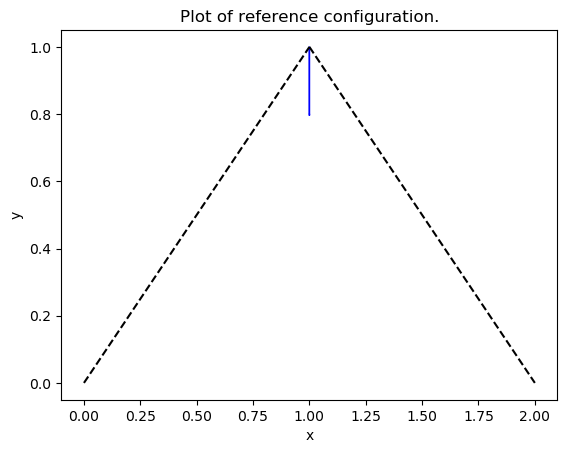

PyObject Text(0.5, 1, 'Plot of reference configuration.')

In [48]:
#using Pkg
#Pkg.add("PyPlot")
using PyPlot

for i in 1:nelems
  plot(Nodes[Conec[i,:],1],Nodes[Conec[i,:],2], color="black", linewidth=1.5, linestyle="--")
end
arrow(Nodes[2,1],Nodes[2,2],0,-0.2,color="blue")
xlabel("x")
ylabel("y")
title("Plot of reference configuration.")


## Analysis

In [49]:
using SparseArrays
KG    = spzeros(2*nnodes, 2*nnodes)
Kbase = [ 1 0 -1 0 ; 0 0 0 0; -1 0 1 0; 0 0 0 0]
typeof( nodes2dofs(Conec[2,[1]], 2) )

Array{Int64,1}

In [50]:
for i in 1:nelems
  elemdofs = nodes2dofs(Conec[i,:], 2)
  ang = Angles[i];
  ca = cos(ang);
  sa = sin(ang);
    
  R = [ ca -sa 0 0; sa  ca 0 0 ; 0 0 ca -sa ; 0  0 sa ca ];
    
  KG[elemdofs, elemdofs ] += E*A/lengths[i] * R * Kbase * R ;
end
FG = vec( zeros(2*nnodes,1) );
FG[4] = -1.0;

In [51]:
println(KG)
println(fredofs)
Kliblib = KG[fredofs,fredofs ];
Flib    = FG[fredofs];
println(Kliblib)
println(Flib)


  [1, 1]  =  0.353553
  [2, 1]  =  0.353553
  [3, 1]  =  -0.353553
  [4, 1]  =  -0.353553
  [1, 2]  =  -0.353553
  [2, 2]  =  -0.353553
  [3, 2]  =  0.353553
  [4, 2]  =  0.353553
  [1, 3]  =  -0.353553
  [2, 3]  =  -0.353553
  [3, 3]  =  0.707107
  [4, 3]  =  0.0
  [5, 3]  =  -0.353553
  [6, 3]  =  0.353553
  [1, 4]  =  0.353553
  [2, 4]  =  0.353553
  [3, 4]  =  0.0
  [4, 4]  =  -0.707107
  [5, 4]  =  -0.353553
  [6, 4]  =  0.353553
  [3, 5]  =  -0.353553
  [4, 5]  =  0.353553
  [5, 5]  =  0.353553
  [6, 5]  =  -0.353553
  [3, 6]  =  -0.353553
  [4, 6]  =  0.353553
  [5, 6]  =  0.353553
  [6, 6]  =  -0.353553
[3, 4]

  [1, 1]  =  0.707107
  [2, 1]  =  0.0
  [1, 2]  =  0.0
  [2, 2]  =  -0.707107
[0.0, -1.0]


In [53]:
u = Kliblib \ Flib ;
UG = vec( zeros( 2*nnodes,1));
UG[fredofs] = u;
println(u)
println(UG)
#matu = vecu2matu(UG)
#println( matu)
#nodesdef = nodes .+ matu

[0.0, 1.4142135623730954]
[0.0, 0.0, 0.0, 1.4142135623730954, 0.0, 0.0]
